<a><img src = "https://pbs.twimg.com/media/DHSvdkSU0AApZbj.png" width = 400, align = "center"></a>

# <center>Diners Hands-ON with Watson Studio (Part 2)</center>

In this notebook, we are going to see an example of Principal Component Analysis, variable selection using Random Forest and at the end we will train a Decision Tree with the clean Jineteo data base.

Let's load the data set.

In [3]:
# The code was removed by Watson Studio for sharing.

,NUMUSODIA,MONTO_TOTAL_DIA,GB_VALOR_AVANCE,GB_DEBMES,SCORE,GB_TRIESGO,GB_PAGPARCR3,GB_VALOR_FACTURAR,MAx_Deuda12M,tipocargo,...,NumAlertas,NUMUSODIADIV_VALES,MONTO_Div_vales,Prioridad,SEGMENTO_GB,SUM_PROM_CONS,MORA_BIN,SOBRECUPO,RECURRENCIA,JINETEO
0,1,300.00,1000,5.15,4,2627.38,1.000000,794.98,691.38,1,...,1,0.0,0.0,1.0,0.0,1704.24250,0,0,0,1
1,1,153.15,500,0.01,2,9282.22,0.965915,487.54,9174.57,1,...,1,0.0,0.0,1.0,1.0,1339.08750,0,0,1,1
2,1,426.00,980,0.01,2,6626.08,1.000000,1696.49,818.21,1,...,1,0.0,0.0,1.0,1.0,1137.62800,0,0,1,1
3,3,301.50,904,0.01,2,10333.27,1.000000,2385.69,45.00,1,...,1,0.0,0.0,3.0,2.0,2464.60625,0,0,1,1
4,1,500.00,971,0.01,4,8362.32,1.000000,1588.07,1155.29,1,...,1,0.0,0.0,1.0,1.0,1145.73500,0,1,1,1


## Principal component analysis with Python
We need to transform string variables to numeric variables to use the sklearn’s PCA algorithm. 

Make sure you have just numeric variables before applying the PCA.

In [4]:
df_data_1.dtypes

NUMUSODIA                  int64
MONTO_TOTAL_DIA          float64
GB_VALOR_AVANCE            int64
GB_DEBMES                float64
SCORE                      int64
GB_TRIESGO               float64
GB_PAGPARCR3             float64
GB_VALOR_FACTURAR        float64
MAx_Deuda12M             float64
tipocargo                  int64
esInversionista            int64
esColaborador              int64
Central_vs_Ingreso       float64
APALNCAMIENTOS_USADOS    float64
%MAX_EXP_OCUPADO         float64
NumAlertas                 int64
NUMUSODIADIV_VALES       float64
MONTO_Div_vales          float64
Prioridad                float64
SEGMENTO_GB              float64
SUM_PROM_CONS            float64
MORA_BIN                   int64
SOBRECUPO                  int64
RECURRENCIA                int64
JINETEO                    int64
dtype: object

Now, let’s select the features for our analysis. We will save them in a data set called *data*.

In [5]:
data = df_data_1[['NUMUSODIA', 'MONTO_TOTAL_DIA', 'GB_VALOR_AVANCE', 'GB_DEBMES', 'SCORE',
       'GB_TRIESGO', 'GB_PAGPARCR3', 'GB_VALOR_FACTURAR', 'MAx_Deuda12M',
       'tipocargo', 'esInversionista', 'esColaborador', 'Central_vs_Ingreso',
       'APALNCAMIENTOS_USADOS', '%MAX_EXP_OCUPADO', 'NumAlertas',
       'NUMUSODIADIV_VALES', 'MONTO_Div_vales', 'Prioridad', 'SEGMENTO_GB',
       'SUM_PROM_CONS', 'MORA_BIN', 'SOBRECUPO', 'RECURRENCIA']]
data.head()

,NUMUSODIA,MONTO_TOTAL_DIA,GB_VALOR_AVANCE,GB_DEBMES,SCORE,GB_TRIESGO,GB_PAGPARCR3,GB_VALOR_FACTURAR,MAx_Deuda12M,tipocargo,...,%MAX_EXP_OCUPADO,NumAlertas,NUMUSODIADIV_VALES,MONTO_Div_vales,Prioridad,SEGMENTO_GB,SUM_PROM_CONS,MORA_BIN,SOBRECUPO,RECURRENCIA
0,1,300.00,1000,5.15,4,2627.38,1.000000,794.98,691.38,1,...,0.495070,1,0.0,0.0,1.0,0.0,1704.24250,0,0,0
1,1,153.15,500,0.01,2,9282.22,0.965915,487.54,9174.57,1,...,0.656911,1,0.0,0.0,1.0,1.0,1339.08750,0,0,1
2,1,426.00,980,0.01,2,6626.08,1.000000,1696.49,818.21,1,...,2.208693,1,0.0,0.0,1.0,1.0,1137.62800,0,0,1
3,3,301.50,904,0.01,2,10333.27,1.000000,2385.69,45.00,1,...,3.444423,1,0.0,0.0,3.0,2.0,2464.60625,0,0,1
4,1,500.00,971,0.01,4,8362.32,1.000000,1588.07,1155.29,1,...,0.892847,1,0.0,0.0,1.0,1.0,1145.73500,0,1,1


First, we need to scale out data. We'll use the function `scale` from the module `preprocessing`.

In [6]:
scaled_data = preprocessing.scale(data)
 
pca = PCA() # we create a PCA object
pca.fit(scaled_data) # we apply the PCA to the standarized data.
pca_data = pca.transform(scaled_data)# we get the coodinates of the Principal Components

You can see bellow, the result is a numpy array.

In [7]:
print(type(pca_data))
pca_data

<class 'numpy.ndarray'>


array([[ -1.67647752e+00,  -6.40274462e-01,   5.27769754e-02, ...,
         -5.06037905e-16,  -4.19993667e-16,   4.07292956e-16],
       [ -5.78761690e-01,  -1.01090167e+00,  -3.94260472e-01, ...,
         -6.58833878e-16,   4.37993152e-16,  -3.16776537e-16],
       [ -4.63962894e-01,  -8.14413437e-01,  -4.48013667e-01, ...,
         -4.25945155e-16,   5.02443548e-18,  -6.83300824e-16],
       ..., 
       [  2.91248488e+00,  -2.37975337e-01,  -7.90480473e-01, ...,
          1.40990505e-16,  -2.67810827e-17,   2.76767702e-17],
       [ -2.63663755e-01,  -1.05713625e+00,  -1.89932818e-01, ...,
         -4.14970107e-16,   7.42167425e-18,  -2.26897689e-16],
       [  4.02342595e-01,  -9.89945725e-01,  -3.47626218e-01, ...,
         -3.77800280e-16,  -3.58070905e-16,  -2.47884714e-16]])

With the following code we can display a bar plot showing the percentage of variance explained by each principal component.

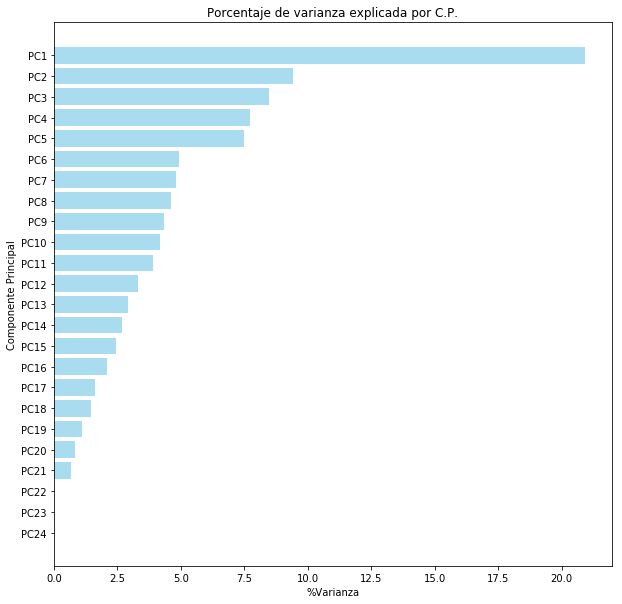

array([ 20.93263542,   9.42169526,   8.46073286,   7.742828  ,
         7.50530756,   4.94843777,   4.79318092,   4.6244461 ,
         4.34830283,   4.17824341,   3.899284  ,   3.30364399,
         2.91678958,   2.68823999,   2.45504962,   2.09099673,
         1.62196324,   1.45886455,   1.11859015,   0.82709798,
         0.66367004,   0.        ,   0.        ,   0.        ])

In [8]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=8)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
y = range(1,len(per_var)+1)
y = y[::-1] #para que las C.P. aparezcan de mayor a menor porcentaje de varianza explicado.
plt.figure(figsize=(10,10))
plt.barh( y,per_var, tick_label=labels, align='center', 
         alpha=0.7, height=0.8, color="skyblue")
plt.ylabel('Componente Principal')
plt.xlabel('%Varianza')
plt.title('Porcentaje de varianza explicada por C.P.')
plt.show()

per_var

## Number of principal components vs Explained Variance 

Let’s plot the accumulated explained variance versus the number of principal components.

This is another way to determine the optimum number of principal components.

In [9]:
pca.explained_variance_ratio_

array([  2.09326354e-01,   9.42169526e-02,   8.46073286e-02,
         7.74282800e-02,   7.50530756e-02,   4.94843777e-02,
         4.79318092e-02,   4.62444610e-02,   4.34830283e-02,
         4.17824341e-02,   3.89928400e-02,   3.30364399e-02,
         2.91678958e-02,   2.68823999e-02,   2.45504962e-02,
         2.09099673e-02,   1.62196324e-02,   1.45886455e-02,
         1.11859015e-02,   8.27097981e-03,   6.63670041e-03,
         1.80151608e-32,   1.46215572e-34,   1.53105715e-35])

Text(0,0.5,'Varianza acumulada explicada')

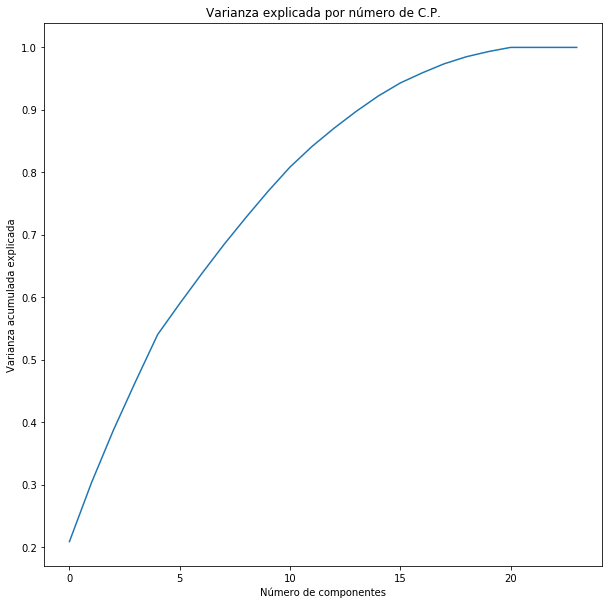

In [10]:
#Escoger el número de componentes
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Varianza explicada por número de C.P.')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')

## Variable selection using Random Forest
In the following cells we’ll train a Random Forest with 250 trees and Mean Decrease Impurity as importance variable criterion.

In [11]:
#Variables dependiente
y = df_data_1.JINETEO
features = data.columns

In [12]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(data, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Now, let's create a data frame with the name of the variable its respective importance.

In [13]:
d = {'Variable': features[indices],'Importancia': importances[indices]} #Creamos un diccionario con los datos y nombres de las columnas
ft_ranking = pd.DataFrame(data=d)
ft_ranking

,Importancia,Variable
0,0.085916,GB_TRIESGO
1,0.084675,GB_DEBMES
2,0.082222,MAx_Deuda12M
3,0.078297,GB_VALOR_AVANCE
4,0.072709,SUM_PROM_CONS
5,0.070172,%MAX_EXP_OCUPADO
6,0.068735,Central_vs_Ingreso
7,0.068136,APALNCAMIENTOS_USADOS
8,0.059406,GB_VALOR_FACTURAR
9,0.055546,SCORE


The following bar plot shows the importance for each variable.


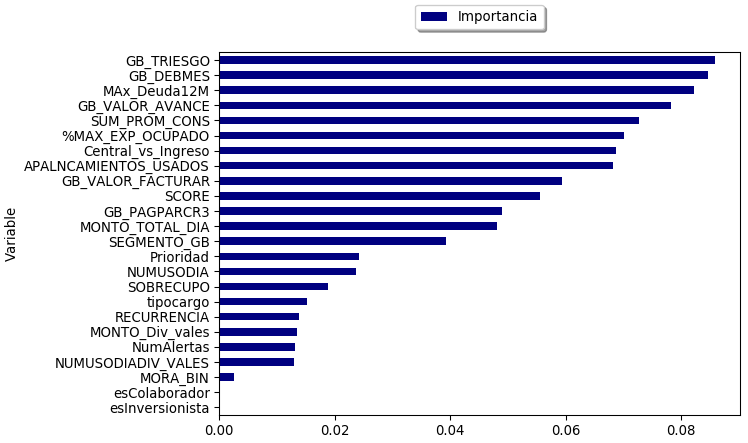

In [14]:
display(ft_ranking)

The variables 'MORA_BIN', 'esColaborador' and 'esInversionista' don't have much importance for the model.

Now let's train a decision tree using the 21 variables with highest importance.

## Decision tree

In [24]:
X = data.drop([ 'MORA_BIN', 'esColaborador','esInversionista', 'tipocargo'], axis = 1)
featureNames = X.columns
X = X.values
print(X[0:5])
y = df_data_1.JINETEO
y[0:5]

[[  1.00000000e+00   3.00000000e+02   1.00000000e+03   5.15000000e+00
    4.00000000e+00   2.62738000e+03   1.00000000e+00   7.94980000e+02
    6.91380000e+02   1.57077215e+01   2.37556962e+00   4.95070492e-01
    1.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   1.70424250e+03   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.53150000e+02   5.00000000e+02   1.00000000e-02
    2.00000000e+00   9.28222000e+03   9.65914634e-01   4.87540000e+02
    9.17457000e+03   8.41522999e+00   4.26965041e+00   6.56911404e-01
    1.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    1.00000000e+00   1.33908750e+03   0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   4.26000000e+02   9.80000000e+02   1.00000000e-02
    2.00000000e+00   6.62608000e+03   1.00000000e+00   1.69649000e+03
    8.18210000e+02   5.70108000e+00   4.41738667e+00   2.20869333e+00
    1.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    1.00000000e+00

0    1
1    1
2    1
3    1
4    1
Name: JINETEO, dtype: int64

### Split the data set into a training set and a test set

In [25]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

### Define a decision tree object and train it

In [26]:
Jineteo_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Jineteo_tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Test the tree's accuracy with the test set

In [27]:
Jineteo_pred = Jineteo_tree.predict(X_testset)
print(Jineteo_pred[0:10])
print(y_testset[0:10])

[1 1 1 1 1 1 1 1 1 1]
6076     1
3045     1
5483     1
1542     1
3479     1
3428     1
2038     1
749      1
14452    1
12398    1
Name: JINETEO, dtype: int64


### Confusion Matrix

In [28]:
confusion_matrix(Jineteo_pred, y_testset)

array([[   7,   11],
       [  73, 2920]])

### F1-score

In [29]:
print("DecisionTrees's F1 score: ", metrics.f1_score(y_testset, Jineteo_pred))

DecisionTrees's F1 score:  0.985820391627


## Plot the decision tree

We can plot the tree with the code bellow.

**Note**: you need to install `pydotplus`library.

In [30]:
!pip install pydotplus

Requirement not upgraded as not directly required: pydotplus in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: pyparsing>=2.0.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pydotplus)


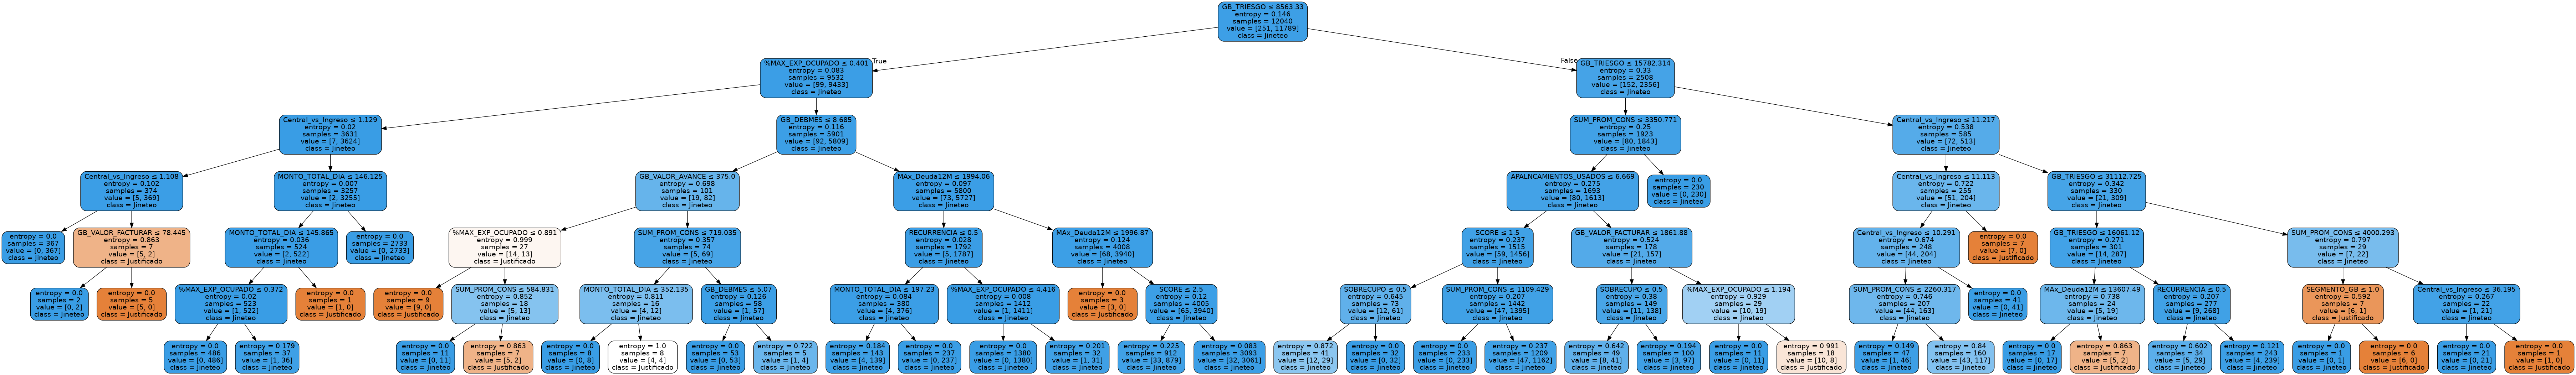

In [31]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(Jineteo_tree, out_file=dot_data,  feature_names=featureNames, class_names= ['Justificado','Jineteo'],
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

